In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
from datetime import datetime

In [2]:
df = pd.read_csv('../data/aqar.csv')

In [3]:
df['onMarket'].mean()

49.2410529429163

In [4]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'DayOfRent', 'onMarket', 'timeBeforeRent'],
      dtype='object')

In [5]:
df['timeBeforeRent'].value_counts()

0      3753
16       96
14       90
10       89
6        88
       ... 
213       1
193       1
254       1
114       1
133       1
Name: timeBeforeRent, Length: 176, dtype: int64

In [6]:
df["onMarket"] = 0

In [7]:
for index , row in df.iterrows():
    if(row['timeBeforeRent'] == 0 ):
        td = int(((datetime.now() ) - (pd.to_datetime( row['create_time'][2:12] , format='%Y-%m-%d')))/np.timedelta64(1, 'D'))
        # # td = int(td )
        df['onMarket'][index] = td
    else:
        df['onMarket'][index] = df['timeBeforeRent'][index]

/tmp/ipykernel_9104/3402429901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = td
/tmp/ipykernel_9104/3402429901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onMarket'][index] = df['timeBeforeRent'][index]


<AxesSubplot:ylabel='Frequency'>

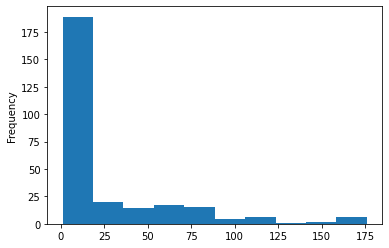

In [8]:
df['onMarket'].value_counts().plot(kind = 'hist')

In [9]:
df['onMarket'].mean()

49.79606625258799

In [10]:
df.to_csv('../data/aqar.csv')